# Assignment 1

**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

**Team Members:** Domenico Dell'Olio, Giovanni Pio Delvecchio, Raffaele Disabato

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES. [What is punctuation?]{https://en.wikipedia.org/wiki/English_punctuation}

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!
If you use random embeddings or placeholder embeddings (e.g., everything is 0) this is automatically solved.

If you want to use other techniques: when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general (brief!) description of the task you have addressed and how you have addressed it
* A brief analysis of the data (class distribution, lenght, etc)
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis


# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the correctness of approach/methodology
* 1 point for the handling of OOV terms
* 1 point for the correct implementation of models (they must run and do the right thing)
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

The evaluation will not be based on the performance of the models!

We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. 

# Deliver

* Two files: a pdf file for the report, and a python notebook
* Put the names of the member of the team at the beginning of both files
* What about additional files, for example models or weights? You can upload them in a private cloud and insert the link in the report.
* Please, submit a notebook with clear sections, text boxes, and comments and indications about what is going on in the code. When we do not understand what is going on we get annoyed, when we are annoyed we tend to be more severe in our evaluation.



# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1273064/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.
If we do not reply within 3-4 days, please send it again!

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# Additional notes and FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* For the baseline, it must have only two trainable layers: the BiLSTM and the Dense/FC one. The Dense layer is the "classification head" with softmax activation. You must not add an additional dense layer on top of the baseline. You can use the embedding layer before the BiLSTM, but it must be not trainable.
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.
* For the application of the Dense Layer, it is recommended to use a Time-Distributed Dense. In any case, doing otherwise is NOT considered an error.
* Some examples of things you can analyze in your discussion and error analysis are: the performances on the most frequent classes and the less frequent classes, precision and recall, the confusion tables, specific misclassified samples.
* Punctuation: you must keep the punctuation in the documents, since it may be helpful for the model, you simply must ignore it when you perform the evaluation of the model, not considering the punctuation classes among the ones you use to compute F1 macro score. If you are curious, you can run ADDITIONAL experiments where you remove punctuation to see its impact.

# STEP 1
We start by downloading and extracting the dataset, resolving dependecies and including the required libraries.


In [1]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
!unzip dependency_treebank.zip
!rm dependency_treebank.zip

--2023-01-04 18:50:11--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457429 (447K) [application/zip]
Saving to: ‘dependency_treebank.zip’

dependency_treebank 100%[===================>] 446.71K  --.-KB/s    in 0.01s   

2023-01-04 18:50:11 (33.6 MB/s) - ‘dependency_treebank.zip’ saved [457429/457429]

Archive:  dependency_treebank.zip
   creating: dependency_treebank/
  inflating: dependency_treebank/wsj_0093.dp  
  inflating: dependency_treebank/wsj_0065.dp  
  inflating: dependency_treebank/wsj_0039.dp  
  inflating: dependency_treebank/wsj_0182.dp  
  inflating: dependency_treebank/wsj_0186.dp  
  inflating: dependency_treebank/wsj_0041.dp  
  inflating:

In [2]:
# Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import os
import string
import numpy as np
import matplotlib.pyplot as plt
import gensim
import gensim.downloader as gloader
import os
import shutil
import random
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay,f1_score, accuracy_score, classification_report, confusion_matrix

from keras_preprocessing.sequence import pad_sequences
from functools import partial

from keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, TimeDistributed, Activation, GRU
from keras.models import Model

%matplotlib inline

# Step 2
We first fix the seed needed for the pseudo-random generation. Then we create directories for the datasets and we split the dataset with samples 1-100 for the train set, 101-150 for the validation set, 151-199 for the test set.
When loading the dataset, every token is lowercased as pre-processing step. Also, during subsequent runs of the notebook, we noticed that curly brackets and round brakets were encoded as "-rcb-", "-lcb-", "-rrb-", "-lrb-". Since these symbols have a representation in GloVe embeddings, but were marked as OOV due to their form, we decided to swap these codes with the actual symbol. This change did not only improve on brackets classes (which will be excluded from the evaluation) but also on the others.

In [4]:
seed = 21
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
#tf.keras.util.set_random_seed(seed)
#tf.config.experimental.enable_op_determinsm()

In [5]:
!mkdir train_set
!mkdir val_set
!mkdir test_set

In [6]:
# Move first 100 text file to train
for i in range(1, 101):
  file_name = "wsj_" + ("0" * (4 - len(str(i)))) + str(i) + ".dp"
  src_name = os.path.join('/content/dependency_treebank/' + file_name)
  trg_name = os.path.join('/content/train_set/' + file_name)
  shutil.move(src_name, trg_name)

# Move 101-150 text file to val
for i in range(101, 151):
  file_name = "wsj_" + ("0" * (4 - len(str(i)))) + str(i) + ".dp"
  src_name = os.path.join('/content/dependency_treebank/' + file_name)
  trg_name = os.path.join('/content/val_set/' + file_name)
  shutil.move(src_name, trg_name)

# Move 151-199 text file to test
for i in range(151, 200):
  file_name = "wsj_" + ("0" * (4 - len(str(i)))) + str(i) + ".dp"
  src_name = os.path.join('/content/dependency_treebank/' + file_name)
  trg_name = os.path.join('/content/test_set/' + file_name)
  shutil.move(src_name, trg_name)

!rm -rf "/content/dependency_treebank"

In [7]:
def create_dataframe(dataset_path, convert_dict):
  """
  This function is needed to return the list of lists containing of lowercased sentences 
  with the associated list of lists of POS tagging labels.
  It allows to replace some tokens with others, if needed.
  It also returns the vocabulary (set) of the words used and the considered POS tags (set).

  :param dataset_path: path where the dataset is stored.
  :param convert_dict: a python dictionary containing pairs (word:replacement) to replace
    specific kind of tokens with other ones
  """

  dataframe_x_rows =  []
  dataframe_y_rows = []

  sentence_x_row = []
  sentence_y_row = []

  words = set([])
  tags = set([])

  for file_name in os.listdir(dataset_path): 
    file_path = dataset_path + "/" + file_name
    file_number = file_name.split(".")[0].split("_")[1]

    with open(file_path, mode='r', encoding='utf-8') as file_text:
      lines = file_text.readlines()

      for line in lines:
        split_line = line.split("\t")
        if len(split_line) > 1:
          word = split_line[0].lower() # lowercasing
          if word in convert_dict.keys():
            word = convert_dict[word]
          pos_tag = split_line[1]

          words.add(word)
          tags.add(pos_tag)

          sentence_x_row.append(word)
          sentence_y_row.append(pos_tag)
          # each entry of the dataset is a sentence, so we stop when we 
          # find a strong punctuation symbol or ";"
        if len(split_line) == 1 or word == ';':
          dataframe_x_rows.append(sentence_x_row)
          dataframe_y_rows.append(sentence_y_row)
          sentence_x_row = []
          sentence_y_row = []

  return dataframe_x_rows, dataframe_y_rows, words, tags

In [8]:
convert_dict = {'-rcb-': '}', '-lcb-':'{', '-rrb-':')', '-lrb-':'('}

In [9]:
df_train_x, df_train_y, train_words, train_tags = create_dataframe("/content/train_set",convert_dict)

In [10]:
df_val_x, df_val_y, val_words, val_tags = create_dataframe("/content/val_set",convert_dict)

In [11]:
df_test_x, df_test_y, test_words, test_tags = create_dataframe("/content/test_set",convert_dict)

#Step 3
Here are presented some statistics over tags and sentences. 
We can observe that the labels are distributed unevenly across examples, having also very rare labels such as FW and UH. Moreover, the validation and testing splits miss some labels w.r.t. the whole set of labels in the dataset.

In [12]:
for cur_df in [df_train_x, df_val_x, df_test_x]:
  sentence_length = [len(i) for i in cur_df]
  mean_sentence_length = sum(sentence_length)/len(sentence_length)
  max_sentence_length = max(sentence_length)
  min_sentence_length = min(sentence_length)
  

  print("Sentence length statistics: ")
  print(f"mean: {mean_sentence_length }")
  print(f"max: {max_sentence_length}")
  print(f"min: {min_sentence_length}")


Sentence length statistics: 
mean: 24.28102564102564
max: 119
min: 2
Sentence length statistics: 
mean: 23.689969604863222
max: 94
min: 2
Sentence length statistics: 
mean: 25.046774193548387
max: 108
min: 2


number of tags in the training set: 45
number of tags in the validation set: 44
number of tags in the test set: 40
number of tags in the whole dataset: 45
Plot of the distributions of tags in train, validation and test: 
Missing tags for the train set: set()
Missing tags for the validation set: {'SYM'}
Missing tags for the test set: {'UH', 'FW', '#', 'LS', 'SYM'}


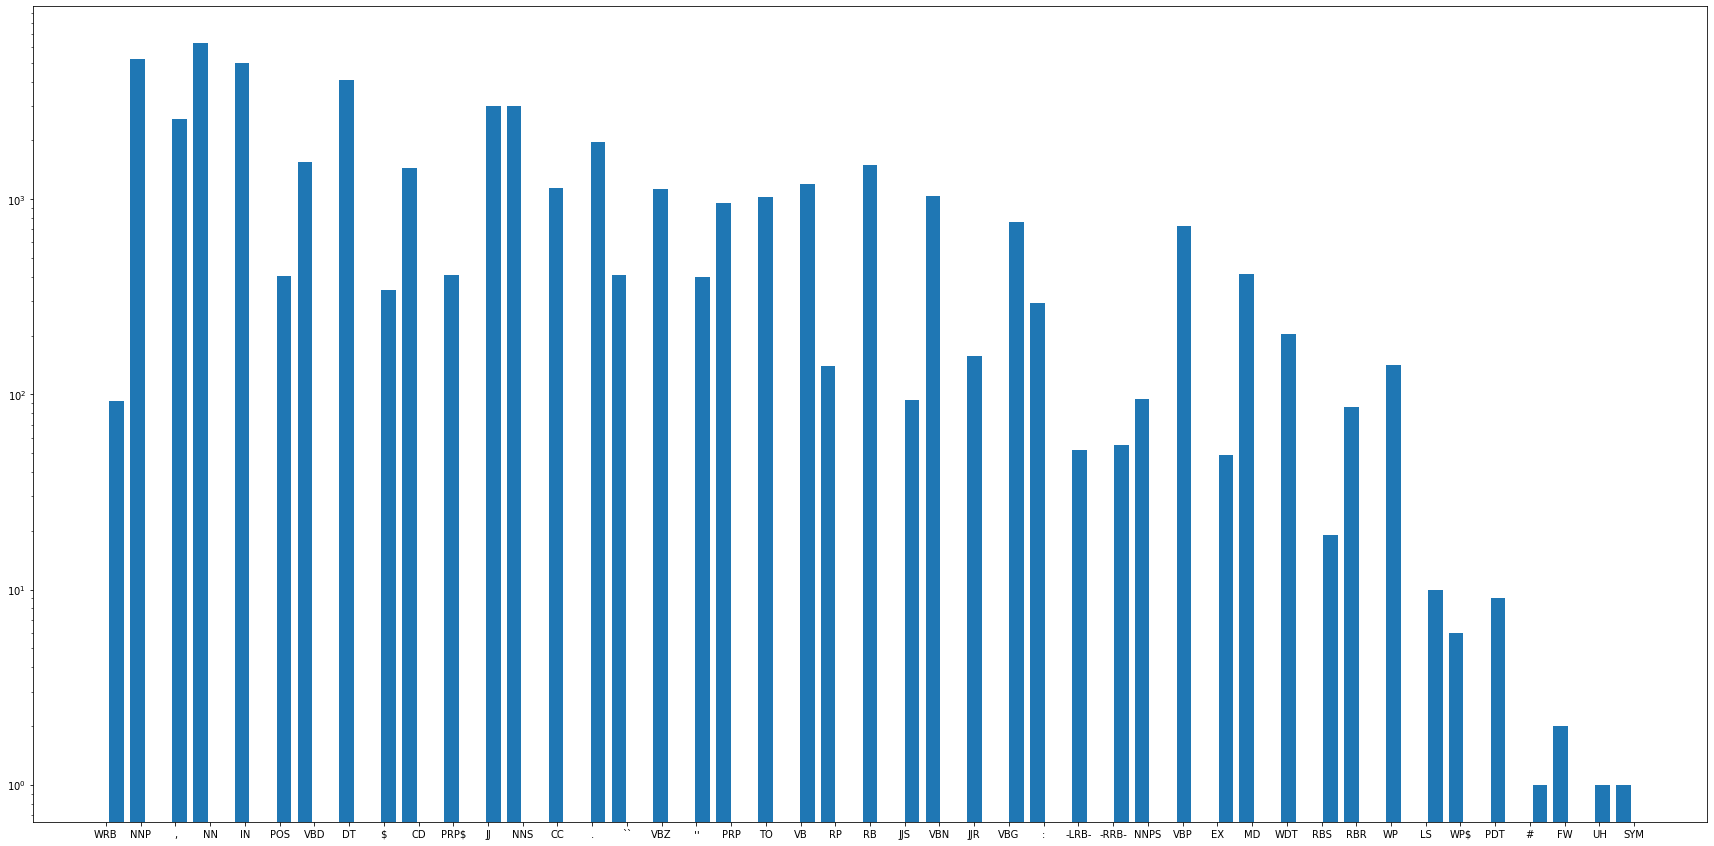

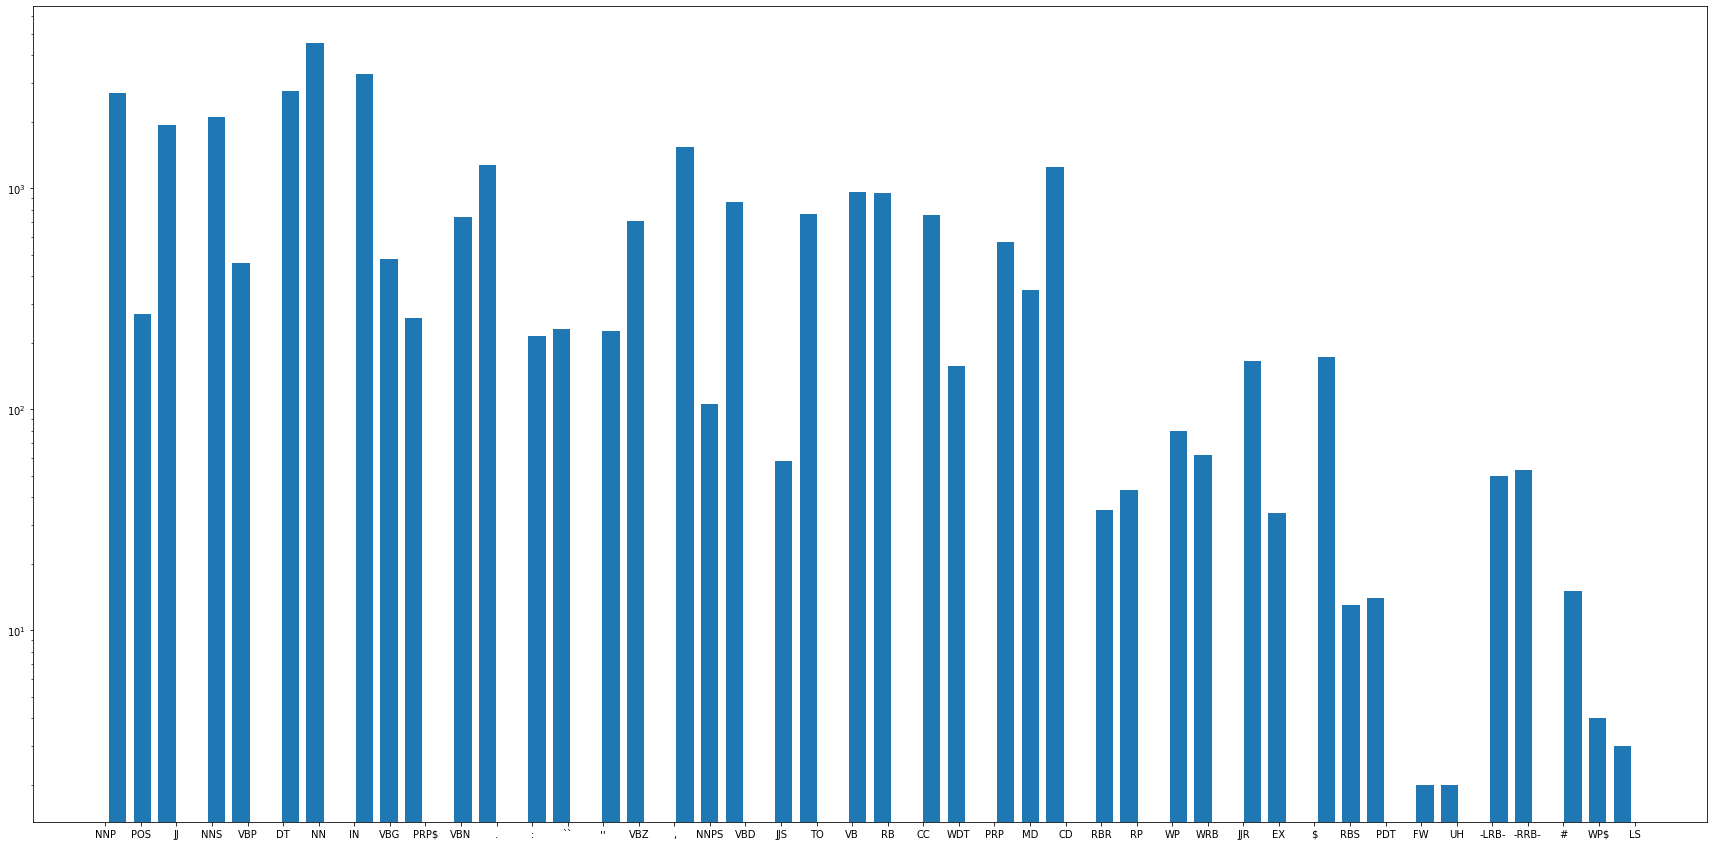

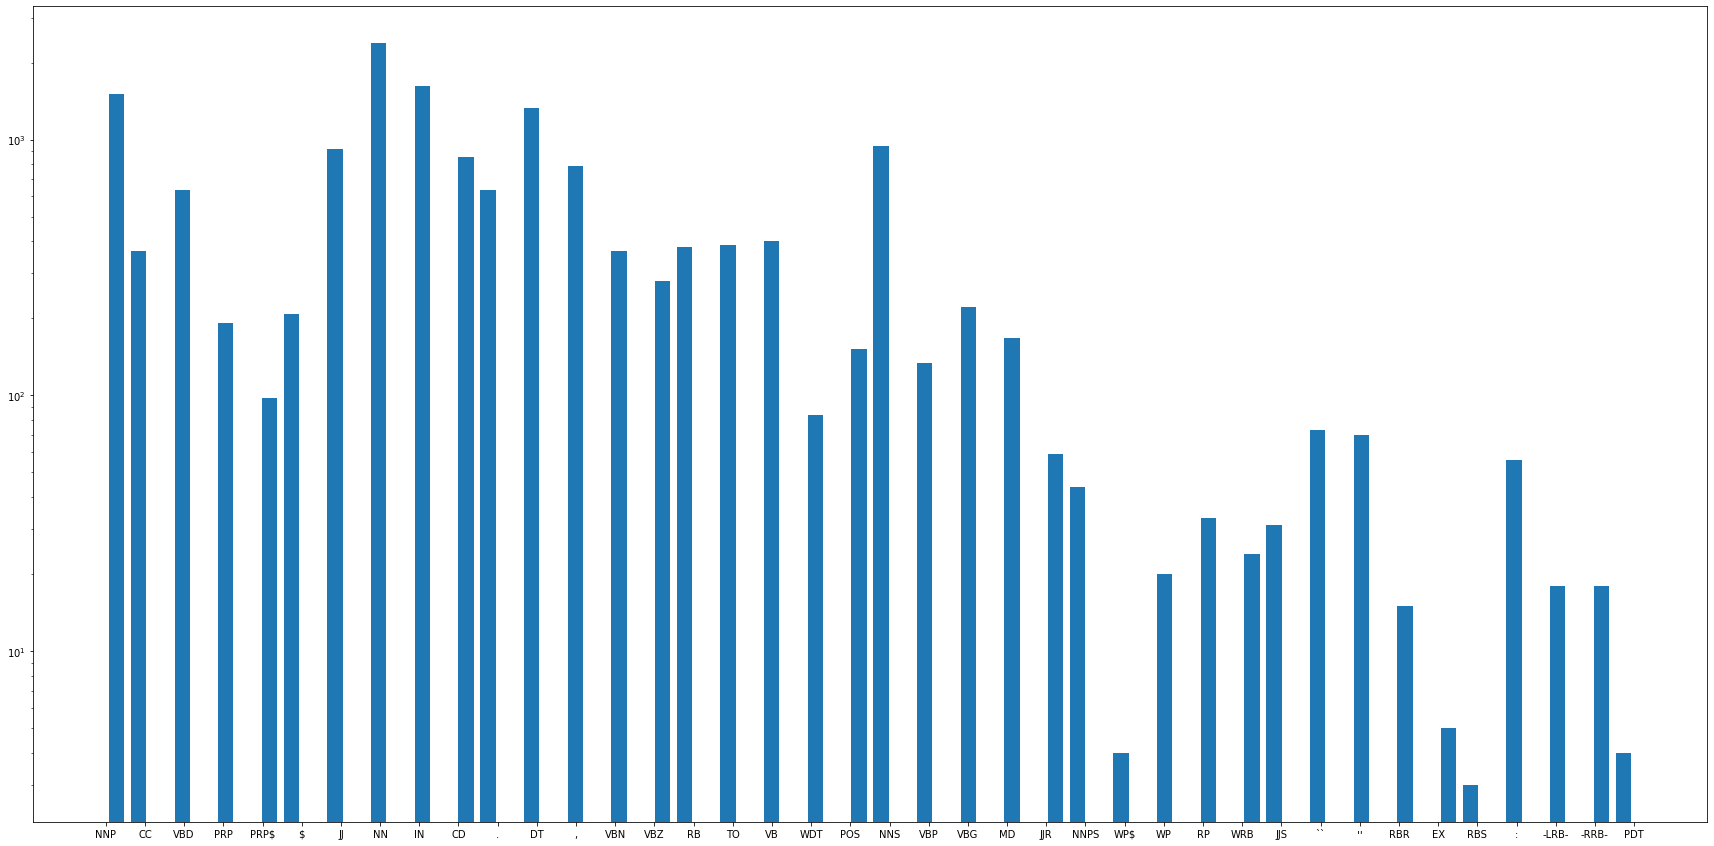

In [13]:
# simple block to plot the distribution of the tags in the datasets
print(f"number of tags in the training set: {len(train_tags)}")
print(f"number of tags in the validation set: {len(val_tags)}")
print(f"number of tags in the test set: {len(test_tags)}")
union_set = train_tags|val_tags|test_tags
print(f"number of tags in the whole dataset: {len(train_tags|val_tags|test_tags)}")

print("Plot of the distributions of tags in train, validation and test: ")
for cur_df in [df_train_y, df_val_y, df_test_y]:
  flatten_y = [word for sentence in cur_df for word in sentence]

  plt.figure(figsize=(30, 15))
  plt.hist(flatten_y, bins="auto", log=True, rwidth=0.7);

missing_train_tags = union_set - train_tags 
missing_val_tags = union_set - val_tags 
missing_test_tags = union_set - test_tags 
print(f"Missing tags for the train set: {missing_train_tags}" )
print(f"Missing tags for the validation set: {missing_val_tags}" )
print(f"Missing tags for the test set: {missing_test_tags}" )

In [14]:
# the current choice is to give an id to each word

unique_word_list = list(train_words | val_words| test_words)
unique_word_list.sort() # set are not guaranteed to be stable, so to keep the process reproducible
  #the word list is sorted
word2index =  {w: i + 2 for i, w in enumerate(unique_word_list)}

word2index['<PAD>'] = 0
word2index['<OOV>'] = 1

# same things applies here it is exploited the possibility to assign an id to
# tags, but one hot encoding could be performed instead
print("Here we show statistics for the vocabularies: ")
print("Lenght of the complete word vocabulary: " + str(len(word2index.keys()))) 
print("Length of the vocabulary of the training set: " + str(len(train_words)))
print("Length of the vocabulary of the validation set: " + str(len(val_words)))
print("Length of the vocabulary of the test set: " + str(len(test_words)))

Here we show statistics for the vocabularies: 
Lenght of the complete word vocabulary: 10949
Length of the vocabulary of the training set: 7404
Length of the vocabulary of the validation set: 5420
Length of the vocabulary of the test set: 3407


In [15]:
def convert_all_sentences_to_indexes(df_x):
  """
  function converting each token of each sentence to the embedding matrix indexes

  :param df_x: list containing the sentences as list of tokens.
  
  """
  sentences_X = []
  for sentence in df_x:
    converted_sentence = []
    for word in sentence:
      try:
        converted_sentence.append(word2index[word])
      except KeyError:
        converted_sentence.append(word2index["<OOV>"])
    sentences_X.append(converted_sentence)
  return sentences_X


In [16]:
train_sentences_X = convert_all_sentences_to_indexes(df_train_x)
val_sentences_X = convert_all_sentences_to_indexes(df_val_x)
test_sentences_X = convert_all_sentences_to_indexes(df_test_x)

print(f"number of sentences in train_sentences_X: {len(train_sentences_X)}")
print(f"number of sentences in val_sentences_X: {len(val_sentences_X)}")
print(f"number of sentences in test_sentences_X: {len(test_sentences_X)}")

number of sentences in train_sentences_X: 1950
number of sentences in val_sentences_X: 1316
number of sentences in test_sentences_X: 620


#Step 4
Then we proceed to split and pad the input sequences. No further preprocessing step is required other than lowercasing all the tokens, as tokenization is already provided by the dataset and techniques as stemming and lemmatization would deprive the words of their syntactic role. Also normalization isn't so necessary due to GloVe containing often redundant embeddings.

In [17]:
# fitting a OneHotEncoder over tags
encoder = OneHotEncoder(sparse = False)
tag_list = list(union_set) 
tag_list.sort() # set are not guaranteed to be stable, so the list is sorted for reproducibility
encoder.fit(np.array(tag_list).reshape(-1, 1))
n_classes = len(union_set)

In [18]:
# we will use this parameter to create the padding of each sentence
MAX_LENGTH = len(max(train_sentences_X, key=len))

In [19]:
# converting tags to the associated indexes
def convert_to_one_hot(df_y, encoder):
  """
  Function encoding tags with their respective one-hot vector.
  It also adds "padding" to keep the length consistent throughout all the examples.
  The padding is obtained by repeating the last tag until the end of the sentence.
  
  :param df_y: list containing the lists of tags to be converted
  :param encoder: sklearn's encoder instance already fit on the whole set of tags
  """
  converted_one_hot_y = []
  for sentence in df_y:
    container = np.zeros((MAX_LENGTH, len(encoder.categories_[0])))
    single_encoded_sentence = encoder.transform(np.array(sentence).reshape(-1, 1))
    len_sentence = single_encoded_sentence.shape[0]
    if len_sentence >= MAX_LENGTH:
      container[:, :] = single_encoded_sentence[:MAX_LENGTH, :]
    else:
      container[:len_sentence, :] = single_encoded_sentence
      container[len_sentence:, :] = single_encoded_sentence[-1, :]
    converted_one_hot_y.append(container)
  return converted_one_hot_y


In [20]:
train_tags_y = convert_to_one_hot(df_train_y, encoder)
val_tags_y = convert_to_one_hot(df_val_y, encoder)
test_tags_y = convert_to_one_hot(df_test_y, encoder)

In [21]:
# printing all the tags in order to recognize which of these are punctuation
# marks
print("List of all tags: ")
for tag in list(union_set):
  print(tag)

List of all tags: 
''
UH
PRP
NNP
EX
PDT
JJS
$
CC
LS
VBD
RB
-RRB-
,
#
JJR
``
WRB
SYM
NNS
:
NNPS
FW
WP
POS
JJ
VBP
RBR
PRP$
TO
.
MD
NN
DT
WP$
IN
VBN
-LRB-
WDT
VBZ
VB
RP
RBS
CD
VBG


In [22]:
# adding a padding to each sentence, since they must have a fixed dimension 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
val_sentences_X = pad_sequences(val_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = np.asarray(train_tags_y)
val_tags_y = np.asarray(val_tags_y)
test_tags_y = np.asarray(test_tags_y)

print(f"shape of train_tags_y: {train_tags_y.shape}")
print(f"shape of val_tags_y: {val_tags_y.shape}")
print(f"shape of test_tags_y: {test_tags_y.shape}")

shape of train_tags_y: (1950, 119, 45)
shape of val_tags_y: (1316, 119, 45)
shape of test_tags_y: (620, 119, 45)


We then proceede to download the file containing GloVe embeddings and to build the embedding matrix. To deal with OOV we tried both random embeddings and "contextual" embeddings built by averaging those of the 2 words preceding and following them in the sentences (see the function for further details). In the end, the latter technique reported slightly lower scores, so we sticked with the former, as it was also more efficient.
The reason could be that more than the semantic content of the word (which is also determined by its context), what is more important in this task is to determine the syntactic role of the word. So, averaging across words that more likely have different roles from the considered one, may be not a good idea.

In [23]:
#   /$$$$$$$  /$$$$$$        /$$   /$$ /$$$$$$ /$$$$$$$$       /$$$$$$$  /$$$$$$ /$$      /$$/$$   /$$/$$       /$$$$$$  /$$$$$$ /$$$$$$$        /$$$$$$$$/$$      /$$/$$$$$$ /$$$$$$ /$$$$$$$$      
#  | $$__  $$/$$__  $$      | $$$ | $$/$$__  $|__  $$__/      | $$__  $$/$$__  $| $$  /$ | $| $$$ | $| $$      /$$__  $$/$$__  $| $$__  $$      |__  $$__| $$  /$ | $|_  $$_//$$__  $| $$_____/      
#  | $$  \ $| $$  \ $$      | $$$$| $| $$  \ $$  | $$         | $$  \ $| $$  \ $| $$ /$$$| $| $$$$| $| $$     | $$  \ $| $$  \ $| $$  \ $$         | $$  | $$ /$$$| $$ | $$ | $$  \__| $$            
#  | $$  | $| $$  | $$      | $$ $$ $| $$  | $$  | $$         | $$  | $| $$  | $| $$/$$ $$ $| $$ $$ $| $$     | $$  | $| $$$$$$$| $$  | $$         | $$  | $$/$$ $$ $$ | $$ | $$     | $$$$$         
#  | $$  | $| $$  | $$      | $$  $$$| $$  | $$  | $$         | $$  | $| $$  | $| $$$$_  $$$| $$  $$$| $$     | $$  | $| $$__  $| $$  | $$         | $$  | $$$$_  $$$$ | $$ | $$     | $$__/         
#  | $$  | $| $$  | $$      | $$\  $$| $$  | $$  | $$         | $$  | $| $$  | $| $$$/ \  $$| $$\  $$| $$     | $$  | $| $$  | $| $$  | $$         | $$  | $$$/ \  $$$ | $$ | $$    $| $$            
#  | $$$$$$$|  $$$$$$/      | $$ \  $|  $$$$$$/  | $$         | $$$$$$$|  $$$$$$| $$/   \  $| $$ \  $| $$$$$$$|  $$$$$$| $$  | $| $$$$$$$/         | $$  | $$/   \  $$/$$$$$|  $$$$$$| $$$$$$$$      
#  |_______/ \______/       |__/  \__/\______/   |__/         |_______/ \______/|__/     \__|__/  \__|________/\______/|__/  |__|_______/          |__/  |__/     \__|______/\______/|________/      
#                                                                                                                                                                                                    
#                                                                                                                                                                                                    
#  (reminder to not waste time)

# setting up the embedding model, in our case it is GloVe
embedding_dimension = 100
embedding_model = gloader.load("glove-wiki-gigaword-" + str(embedding_dimension))

[==================================================] 100.0% 128.1/128.1MB downloaded


In [24]:
# this more elaborate way of computing embedding is not much useful than using random ones

def compute_embedding(word, embedding_model, dataset, previously_computed_embeddings):
  """
  given a word, an embedding_model, the dataset to consider and the previously_computed_embeddings,
  we compute the embedding for an OOV word as the mean of the embeddings of the two preceeding and following words
  in each sentence of the whole dataset (i.e. if we just have the sentence w_1 w_2 oov w_3 w_4 
  we have emb_oov = (ew_1 + ew_2 + ew_3 + ew_4)/4
  if a neighbouring word is an oov itself, we add a random vector and if the target oov word has no neighbors
  we assign a random vector as its embedding.

  :param word: the word which embedding must be computed
  :param embedding_model: dictionary containing words and their pre-trained embedding
  :param dataset: list of sentencese where the contexts of word can be extracted
  :param previously_computed_embeddings: dictionary containing words and their embedding
    already computed by this function. This allows the embedding computation pipeline to be correct w.r.t.
    standard procedures when dealing with the different dataset splits
  """
  acc = np.zeros(embedding_dimension)
  count = 0
  for sentence in dataset: # for every sentence in the dataset
    if word in sentence: # if the word is in the sentence
      index = sentence.index(word) # get the index of the sentence

      if index != 0: # if the token isn't the initial one 
        try:
          acc += embedding_model[sentence[index-1]] # add the embedding if it is in gloVe
        except (KeyError, TypeError):
          if sentence[index-1] in previously_computed_embeddings.keys(): # add the embedding if was already computed
            acc += previously_computed_embeddings[sentence[index-1]]
          else:
            # otherwise add a random vector
            acc += np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)
        # increment the count
        count += 1
      # if the word isn't the last, do the same as before

      if index != len(sentence)-1:
        try:
          acc += embedding_model[sentence[index+1]] 
        except (KeyError, TypeError):
          if sentence[index+1] in previously_computed_embeddings.keys():
            acc += previously_computed_embeddings[sentence[index+1]]
          else:
            acc += np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)
        count += 1

      if index != 1: # if the token isn't the initial one 
        try:
          acc += embedding_model[sentence[index-2]] # add the embedding if it is in gloVe
        except (KeyError, TypeError):
          if sentence[index-2] in previously_computed_embeddings.keys(): # add the embedding if was already computed
            acc += previously_computed_embeddings[sentence[index-2]]
          else:
            # otherwise, add a random vector
            acc += np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)
        # increment the count
        count += 1
      # if the word isn't the last, do the same as before

      if index != len(sentence)-2:
        try:
          acc += embedding_model[sentence[index+2]] 
        except (KeyError, TypeError):
          if sentence[index+2] in previously_computed_embeddings.keys():
            acc += previously_computed_embeddings[sentence[index+2]]
          else:
            acc += np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)
        count += 1
      
# return the mean embedding
  if count == 0:
    return np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)
  else:
    return acc/count


In [25]:
# construction of the embedding matrix, it is a matrix N_token x E_dim
# whose entries are the vectors corresponding to each word in the 
# embedding space, identified by idx
def build_embedding(num_tokens, embedding_dimension, 
                    word2index, embedding_model, 
                    df_train_x = None, df_val_x = None, df_test_x = None,
                    train_words = None, val_words = None, test_words = None, use_random_embedding = True):
  """
  function building the embedding matrix.

  :param num_tokens: total number of different tokens in the corpus
  :param embedding_dimension: lenght of the vector embeddings
  :param word2index: dictionary of pairs (word : token_idx). Contains also OOV and PAD indexes
  :param embedding_model: dictionary containing the pre-trained embeddings
  :param df_train_x, df_val_x, df_test_x: (optional) corpus dataset required to compute contextual embeddings
  :param train_words, val_words, test_words: (optional) corpus vocabulary required to compute contextual embeddings
  :param use_random_embedding: boolean indicating whether to use randomly generated embeddings or contextual embeddings
  """
  oov_dict = {'training':[], 'val':[], 'test':[]}
  # we need to count how many oov we have
  count_oov = 0
  oov_list = []
  embedding_matrix = np.zeros((num_tokens, embedding_dimension))
  for word, idx in word2index.items():
    # we give an embedding also to the padding, which will be ignored by the net
    try:
      embedding_vector = embedding_model[word]
      embedding_matrix[idx] = embedding_vector
    except (KeyError, TypeError):
      count_oov += 1
      oov_list.append(word)
      if use_random_embedding:
        embedding_vector = np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension) # random placeholder
        embedding_matrix[idx] = embedding_vector
      else:
        if word in train_words:
          oov_dict['training'].append(word)
        elif word in val_words:
          oov_dict['val'].append(word)
        elif word in test_words:
          oov_dict['test'].append(word)

  if not use_random_embedding:
    previously_computed_embeddings = dict()
    for oov in oov_dict['training']:
      vector = compute_embedding(oov, embedding_model, df_train_x, previously_computed_embeddings)
      embedding_matrix[word2index[oov]] = vector
      previously_computed_embeddings[oov] = vector

    for oov in oov_dict['val']:
      vector = compute_embedding(oov, embedding_model, df_val_x, previously_computed_embeddings)
      embedding_matrix[word2index[oov]] = vector
      previously_computed_embeddings[oov] = vector

    for oov in oov_dict['test']:
      vector = compute_embedding(oov, embedding_model, df_test_x, previously_computed_embeddings)
      embedding_matrix[word2index[oov]] = vector
      previously_computed_embeddings[oov] = vector
  return embedding_matrix, count_oov, oov_list



In [26]:
num_tokens = len(word2index.keys())
embedding_matrix, count_oov, oov_list = build_embedding(num_tokens, embedding_dimension, 
                                                        word2index, embedding_model)
print(f"total number of OOV: {count_oov}")
print(f"OOV list: {oov_list}")

total number of OOV: 674
OOV list: ['0.0085', '1.1650', '1.457', '1.5755', '1.637', '1.8415', '1.916', '100,980', '100-megabyte', '11,390,000', '11,762', '11-month-old', '11\\/16', '12,252', '120-a-share', '1206.26', '126.15', '127.03', '129.91', '12\\/32', '13,056', '13.625', '131.01', '13\\/16', '14,821', '14.', '142.84', '142.85', '143.08', '143.80', '143.93', '14\\/32', '154,240,000', '158,666', '16,072', '16.125', '16\\/32', '170,262', '1738.1', '18,444', '18-a-share', '188.84', '19-month-old', '190-point', '1928-33', '1937-40', '1\\/10th', '1\\/2', '1\\/4', '1\\/8', '2,050-passenger', '2,303,328', '20-stock', '2003\\/2007', '2141.7', '2160.1', '2163.2', '220.45', '226,570,380', '22\\/32', '23,403', '230-215', '234.4', '236.74', '236.79', '237-seat', '238,000-circulation', '26,956', '263.07', '2645.90', '2691.19', '271,124', '271-147', '278.7', '292.32', '29year', '2\\/32', '3,040,000', '3,250,000', '3,288,453', '3.253', '30,537', '30,841', '300-113', '300-a-share', '300-day', '30

# Step 5
In the following section we present the part of the code dedicated to model building and training.
For each model (baseline and the three variations) a function for building it with keras' functional API is provided. The hyperparameters for each model have been tuned with a trial-and-error approach, where we adjusted them according to the insight we would receive through train statistics. Each model is provided directly with the best found hyperparameters.

In [27]:
# plotting function needed to show bias and variance of the fitted network
def show_history(history: tf.keras.callbacks.History):
    """
    Shows training history data stored by the History Keras callback

    :param history: History Keras callback
    """
    history_data = history.history

    for key, value in history_data.items():
        if not key.startswith('val'):
            fig, ax = plt.subplots(1, 1)
            ax.set_title(key)
            ax.plot(value)
            if f'val_{key}' in history_data:
                ax.plot(history_data[f'val_{key}'])
            else:
                print(f"Couldn't find validation values for metric: {key}")

            ax.set_ylabel(key)
            ax.set_xlabel('epoch')
            ax.legend(['train', 'val'], loc='best')
    plt.show()

In [28]:
baseline_lr = 1e-2

def baseline_model(num_tokens, embedding_dimension, embedding_matrix, n_classes):
  """
  Function building the baseline model.

  :param num_tokens: the total number of different tokens in the training corpus
  :param embedding_dimension: dimension of the embedding vectors
  :param embedding_matrix: matrix containing the embedding vectors for the embedding layer
  :param n_classes: number of classes in the dataset. It is required to set the output dimension of the model
  """
  input = Input(shape=(None,), dtype="int32")
  x = Embedding(num_tokens,
                embedding_dimension,
                embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                trainable=False,
                mask_zero=True)(input) # masking avoids considering padding
  x = Bidirectional(LSTM(100, return_sequences = True))(x) # number of neurons multiples of 10 seem to work better
  x = TimeDistributed(Dense(n_classes, activation="softmax"))(x) 
  return Model(input, x)

A small interesting remark on the GRU model variation is that it is the only one taking advantage of a smaller learning rate. This could be a consequence of the GRU layer being much simpler than the LSTM one, so it is less prone to overfitting and requires a more precise training phase.

In [29]:
GRU_lr = 1e-3

def GRU_model(num_tokens, embedding_dimension, embedding_matrix, n_classes):
  """
  Function building the GRU variation of the baseline model.

  :param num_tokens: the total number of different tokens in the training corpus
  :param embedding_dimension: dimension of the embedding vectors
  :param embedding_matrix: matrix containing the embedding vectors for the embedding layer
  :param n_classes: number of classes in the dataset. It is required to set the output dimension of the model
  """
  input = Input(shape=(None,), dtype="int32")
  x = Embedding(num_tokens,
                embedding_dimension,
                embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                trainable=False,
                mask_zero=True)(input)
  x = Bidirectional(GRU(100, return_sequences = True))(x) # number of neurons multiples of 10 seem to work better
  x = TimeDistributed(Dense(n_classes, activation="softmax"))(x) 
  return Model(input, x)

In [30]:
doubleLSTM_lr = 1e-2

def doubleLSTM_model(num_tokens, embedding_dimension, embedding_matrix, n_classes):
  """
  Function building the Two-LSTM variation of the baseline model.

  :param num_tokens: the total number of different tokens in the training corpus
  :param embedding_dimension: dimension of the embedding vectors
  :param embedding_matrix: matrix containing the embedding vectors for the embedding layer
  :param n_classes: number of classes in the dataset. It is required to set the output dimension of the model
  """
  input = Input(shape=(None,), dtype="int32")
  x = Embedding(num_tokens,
                embedding_dimension,
                embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                trainable=False,
                mask_zero=True)(input)
  x = Bidirectional(LSTM(100, return_sequences = True))(x)
  x = Bidirectional(LSTM(100, return_sequences = True))(x)
  x = TimeDistributed(Dense(n_classes, activation="softmax"))(x) 
  return Model(input, x)

In [31]:
doubleDense_lr = 1e-2

def doubleDense_model(num_tokens, embedding_dimension, embedding_matrix, n_classes):
  """
  Function building the Two-TDDense variation of the baseline model.

  :param num_tokens: the total number of different tokens in the training corpus
  :param embedding_dimension: dimension of the embedding vectors
  :param embedding_matrix: matrix containing the embedding vectors for the embedding layer
  :param n_classes: number of classes in the dataset. It is required to set the output dimension of the model
  """
  input = Input(shape=(None,), dtype="int32")
  x = Embedding(num_tokens,
                embedding_dimension,
                embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                trainable=False,
                mask_zero=True)(input)
  x = Bidirectional(LSTM(100, return_sequences = True))(x)
  x = TimeDistributed(Dense(100, activation="relu"))(x)#relu avoids value squashing
  x = TimeDistributed(Dense(n_classes, activation="softmax"))(x) 
  return Model(input, x)

After the model functions we defined some useful callbacks: 
- an EarlyStopping callback, in order to avoid overtraining of the model (and consequent overfitting). The monitored parameter is the validation loss, as the f1-score cannot be computed while running the training
- a LearningRateScheduler callback, with different scheduling functions. These were introduced as the models are being finetuned from a pretrained baseline (GloVe Embeddings), so this kind of scheduling could have helped to achieve more precise results. In the end they were tested but, as they did not bring remarkable improvements, they were removed.

In [32]:
def step_scheduler(epoch, lr):
  """
  Scheduling function halving the learning rate every three epochs

  :param epoch: current epoch index
  :param lr: current learning rate value
  """
  if epoch>1 and epoch % 3 == 0:
    return lr/2
  else: 
    return lr

def linear_scheduler(epoch, lr):
  """
  Scheduler function reducing the learning rate following a linear law, starting from the initial given learning rate
  and ending up to 0 at the hypotetical end of the training. It is a typical scheduler employed in NLP tasks

  :param epoch: current epoch index
  :param lr: current learning rate value
  """
  final_learning_rate = 0 # value of the learning rate at the hypotetical end of the training
  lr_to_return = final_learning_rate + (training_info["lr"]- final_learning_rate) * (1 - epoch/training_info["epochs"])
  return lr_to_return


def warmup_scheduler(epoch, lr):
  """
  Scheduler function starting with a low learning rate, then boosting it after some epochs and applying the 
  step scheduler after the boost.

  :param epoch: current epoch index
  :param lr: current learning rate value
  """
  starting_ones = 5 # number of initial epochs with low learning rate
  if epoch < starting_ones:
    return 1e-3
  elif epoch == starting_ones:  
    return step_scheduler(epoch, training_info["lr"])
  else:
    return step_scheduler(epoch, lr)


pat = 10 #setting the patience value
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=pat, min_delta=1e-4, restore_best_weights=True)

scheduler_verbose_par = 1 #setting the scheduler verbosity
scheduler = tf.keras.callbacks.LearningRateScheduler(step_scheduler, scheduler_verbose_par) #unused

Then the remaining hyperparameters were set as such:
- Max. epochs = 100
- Batch size = 64

As changing this values across different experiments didn't brought significant changes, they were keept the same for all the model variations.

In [33]:
training_info = {
    'verbose': 1,
    'epochs': 100,
    'batch_size': 64,
}

In [34]:
baseline = baseline_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)
baseline.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(baseline_lr),
              metrics=['accuracy'])

baseline.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         1094900   
                                                                 
 bidirectional (Bidirectiona  (None, None, 200)        160800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, None, 45)         9045      
 ibuted)                                                         
                                                                 
Total params: 1,264,745
Trainable params: 169,845
Non-trainable params: 1,094,900
_________________________________________________________________


Start training of baseline! 
Parameters: {'verbose': 1, 'epochs': 100, 'batch_size': 64}
Epoch 1/100
31/31 [==============================] - 15s 121ms/step - loss: 0.2954 - accuracy: 0.6222 - val_loss: 0.1196 - val_accuracy: 0.8311
Epoch 2/100
31/31 [==============================] - 1s 26ms/step - loss: 0.0880 - accuracy: 0.8777 - val_loss: 0.0782 - val_accuracy: 0.8858
Epoch 3/100
31/31 [==============================] - 1s 27ms/step - loss: 0.0608 - accuracy: 0.9141 - val_loss: 0.0656 - val_accuracy: 0.9050
Epoch 4/100
31/31 [==============================] - 1s 27ms/step - loss: 0.0467 - accuracy: 0.9357 - val_loss: 0.0615 - val_accuracy: 0.9086
Epoch 5/100
31/31 [==============================] - 1s 26ms/step - loss: 0.0377 - accuracy: 0.9473 - val_loss: 0.0551 - val_accuracy: 0.9192
Epoch 6/100
31/31 [==============================] - 1s 28ms/step - loss: 0.0292 - accuracy: 0.9608 - val_loss: 0.0530 - val_accuracy: 0.9200
Epoch 7/100
31/31 [==============================] - 1s 2

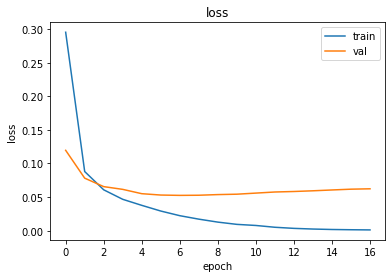

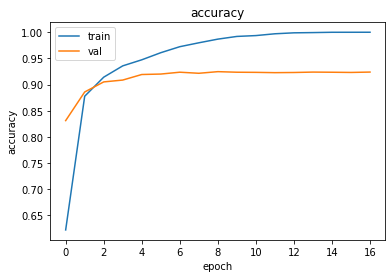

In [35]:
print(f"Start training of baseline! \nParameters: {training_info}")
history = baseline.fit(x=train_sentences_X,
                    y=train_tags_y,
                    validation_data=(val_sentences_X, 
                                     val_tags_y),
                    callbacks =[es], #[scheduler, es],
                    **training_info)
show_history(history)

In [36]:
gru = GRU_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)
gru.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(GRU_lr),
              metrics=['accuracy'])

gru.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 100)         1094900   
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 200)        121200    
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, None, 45)         9045      
 tributed)                                                       
                                                                 
Total params: 1,225,145
Trainable params: 130,245
Non-trainable params: 1,094,900
_________________________________________________________________


Start training of GRU variation! 
Parameters: {'verbose': 1, 'epochs': 100, 'batch_size': 64}
Epoch 1/100
31/31 [==============================] - 10s 105ms/step - loss: 0.5672 - accuracy: 0.3339 - val_loss: 0.4064 - val_accuracy: 0.5126
Epoch 2/100
31/31 [==============================] - 1s 25ms/step - loss: 0.3112 - accuracy: 0.6269 - val_loss: 0.2312 - val_accuracy: 0.7103
Epoch 3/100
31/31 [==============================] - 1s 25ms/step - loss: 0.1889 - accuracy: 0.7680 - val_loss: 0.1626 - val_accuracy: 0.7899
Epoch 4/100
31/31 [==============================] - 1s 25ms/step - loss: 0.1396 - accuracy: 0.8254 - val_loss: 0.1304 - val_accuracy: 0.8292
Epoch 5/100
31/31 [==============================] - 1s 24ms/step - loss: 0.1139 - accuracy: 0.8551 - val_loss: 0.1110 - val_accuracy: 0.8521
Epoch 6/100
31/31 [==============================] - 1s 25ms/step - loss: 0.0979 - accuracy: 0.8731 - val_loss: 0.0984 - val_accuracy: 0.8673
Epoch 7/100
31/31 [==============================] -

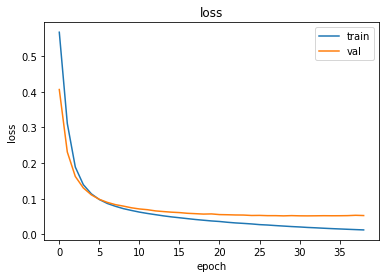

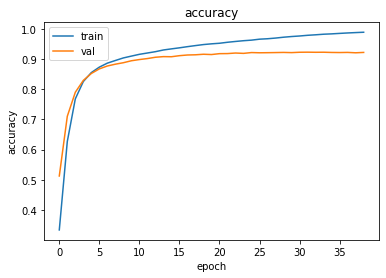

In [37]:
print(f"Start training of GRU variation! \nParameters: {training_info}")
history = gru.fit(x=train_sentences_X,
                    y=train_tags_y,
                    validation_data=(val_sentences_X, 
                                     val_tags_y),
                    callbacks =[es], #[scheduler, es],
                    **training_info)
show_history(history)

In [38]:
doubleLSTM = doubleLSTM_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)
doubleLSTM.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(doubleLSTM_lr),
              metrics=['accuracy'])

doubleLSTM.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 100)         1094900   
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 200)        160800    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, None, 200)        240800    
 nal)                                                            
                                                                 
 time_distributed_2 (TimeDis  (None, None, 45)         9045      
 tributed)                                                       
                                                           

Start training of double LSTM variation! 
Parameters: {'verbose': 1, 'epochs': 100, 'batch_size': 64}
Epoch 1/100
31/31 [==============================] - 21s 225ms/step - loss: 0.4870 - accuracy: 0.3468 - val_loss: 0.2385 - val_accuracy: 0.6651
Epoch 2/100
31/31 [==============================] - 1s 46ms/step - loss: 0.1443 - accuracy: 0.8006 - val_loss: 0.0969 - val_accuracy: 0.8606
Epoch 3/100
31/31 [==============================] - 1s 47ms/step - loss: 0.0744 - accuracy: 0.8947 - val_loss: 0.0693 - val_accuracy: 0.8998
Epoch 4/100
31/31 [==============================] - 1s 46ms/step - loss: 0.0505 - accuracy: 0.9288 - val_loss: 0.0595 - val_accuracy: 0.9109
Epoch 5/100
31/31 [==============================] - 1s 46ms/step - loss: 0.0370 - accuracy: 0.9474 - val_loss: 0.0509 - val_accuracy: 0.9243
Epoch 6/100
31/31 [==============================] - 1s 46ms/step - loss: 0.0272 - accuracy: 0.9616 - val_loss: 0.0507 - val_accuracy: 0.9245
Epoch 7/100
31/31 [=========================

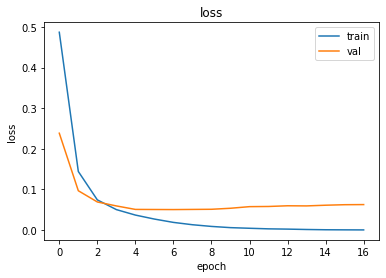

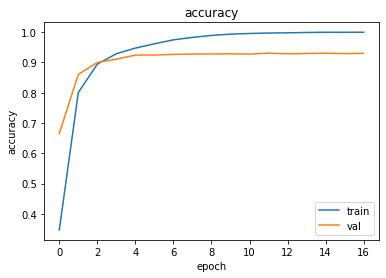

In [39]:
print(f"Start training of double LSTM variation! \nParameters: {training_info}")
history = doubleLSTM.fit(x=train_sentences_X,
                    y=train_tags_y,
                    validation_data=(val_sentences_X, 
                                     val_tags_y),
                    callbacks =[es], #[scheduler, es],
                    **training_info)
show_history(history)

In [40]:
doubleDense = doubleDense_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)
doubleDense.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(doubleDense_lr),
              metrics=['accuracy'])

doubleDense.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 100)         1094900   
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 200)        160800    
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, None, 100)        20100     
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, None, 45)         4545      
 tributed)                                                       
                                                           

Start training of double dense layer variation! 
Parameters: {'verbose': 1, 'epochs': 100, 'batch_size': 64}
Epoch 1/100
31/31 [==============================] - 11s 110ms/step - loss: 0.3621 - accuracy: 0.5162 - val_loss: 0.1419 - val_accuracy: 0.7953
Epoch 2/100
31/31 [==============================] - 1s 28ms/step - loss: 0.0980 - accuracy: 0.8627 - val_loss: 0.0810 - val_accuracy: 0.8822
Epoch 3/100
31/31 [==============================] - 1s 27ms/step - loss: 0.0608 - accuracy: 0.9138 - val_loss: 0.0639 - val_accuracy: 0.9049
Epoch 4/100
31/31 [==============================] - 1s 27ms/step - loss: 0.0431 - accuracy: 0.9373 - val_loss: 0.0572 - val_accuracy: 0.9164
Epoch 5/100
31/31 [==============================] - 1s 26ms/step - loss: 0.0317 - accuracy: 0.9550 - val_loss: 0.0535 - val_accuracy: 0.9199
Epoch 6/100
31/31 [==============================] - 1s 26ms/step - loss: 0.0227 - accuracy: 0.9685 - val_loss: 0.0527 - val_accuracy: 0.9246
Epoch 7/100
31/31 [==================

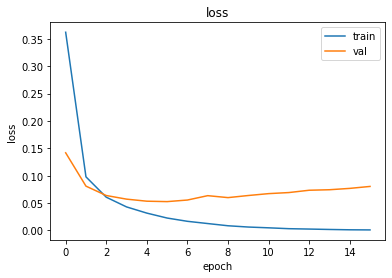

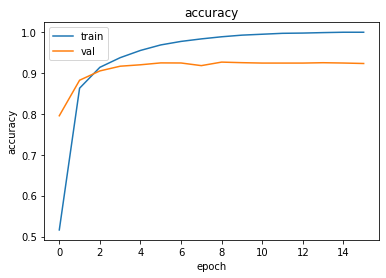

In [41]:
print(f"Start training of double dense layer variation! \nParameters: {training_info}")
history = doubleDense.fit(x=train_sentences_X,
                    y=train_tags_y,
                    validation_data=(val_sentences_X, 
                                     val_tags_y),
                    callbacks =[es], #[scheduler, es],
                    **training_info)
show_history(history)

In [42]:
# uncomment to load weights
"""
from google.colab import drive
drive.mount("drive")
baseline = baseline_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)
baseline.load_weights("/content/drive/MyDrive/baseline.h5")
gru = GRU_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)
gru.load_weights("/content/drive/MyDrive/gru.h5")
doubleLSTM = doubleLSTM_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)
doubleLSTM.load_weights("/content/drive/MyDrive/dlstm.h5")
doubleDense = doubleDense_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)
doubleDense.load_weights("/content/drive/MyDrive/ddense.h5")
"""

'\nfrom google.colab import drive\ndrive.mount("drive")\nbaseline = baseline_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)\nbaseline.load_weights("/content/drive/MyDrive/baseline.h5")\ngru = GRU_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)\ngru.load_weights("/content/drive/MyDrive/gru.h5")\ndoubleLSTM = doubleLSTM_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)\ndoubleLSTM.load_weights("/content/drive/MyDrive/dlstm.h5")\ndoubleDense = doubleDense_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)\ndoubleDense.load_weights("/content/drive/MyDrive/ddense.h5")\n'

In [43]:
# saving the weights
baseline.save_weights("baseline.h5")
gru.save_weights("gru.h5")
doubleLSTM.save_weights("dlstm.h5")
doubleDense.save_weights("ddense.h5")

#Step 6
As next step, we evaluate the models on the validation set in order to compare them, other than on the basis of the validation loss.

In [44]:
def convert_labels(e):
  """
  function to convert a distribution to a one hot encoding of a label, setting the
  highest value to 1 and all the rest to 0

  :param e: numpy array containing the distribution to be converted
  """
  # set the highest value to 1
  e[np.argmax(e)]=1
  # set the rest to 0
  e[e!=1]=0
  return e

def reduce_results(y_true, y_pred, encoder):
  """
  function flattening and transforming the prediction results into a long list of tags to be 
  compared with the corresponent list of true labels. It also removes padding values.

  :param y_true: the original labels without padding 
  :param y_pred: the neural nework output
  :param encoder: the one hot encoder instance used to encode true labels
  """
  max_length = len(y_pred[0])
  verylonglist_pred = []
  verylonglist_true = []
  for j in range(len(y_true)):
    maxlen = min(len(y_true[j]), max_length)
    for i in range(0,maxlen):
      verylonglist_pred.append(convert_labels(y_pred[j][i]))
      verylonglist_true.append(y_true[j][i])

  verylonglist_pred = encoder.inverse_transform(verylonglist_pred)  
  return verylonglist_true, verylonglist_pred

As required, the following evaluations will be performed discarding the examples with true labels concering punctuation and symbols, as they can be easily recognized with a simple regular expression. 
Moreover, both validation and test sets may be missing some labels. The corresponding F1-scores are set to 0 (with the parameter <code>zero_division=0</code> of scikit learn's <code>classification_report</code>). This choice was made because, even if the concept of F1-score of a missing label is ill-posed by itself and substituting it with a 0 will bias the final average, it still will provide a lower limit to the models' actual performance.

Finally, to help error analysis, confusion matrixes are plotted. They are normalized on rows, thus showing recall. This choice was made to individuate difficult classes faster.


In [45]:
# getting the predictions for the validation set
baseline_pred = baseline.predict(val_sentences_X)
GRU_pred = gru.predict(val_sentences_X)
doubleLSTM_pred = doubleLSTM.predict(val_sentences_X)
doubleDense_pred = doubleDense.predict(val_sentences_X)

# list of labels to be suppressed
to_suppress = np.array(["\'\'", "-RRB-", ".", 
                          ":", ",", "-LRB-", "``", 
                          "#", "$", "SYM"])


# labels to be kept when computing metrics
relevant_labels = [encoder.categories_[0][i] for i in range(0, len(encoder.categories_[0])) if encoder.categories_[0][i] not in to_suppress]

print(f"relevant labels: ({len(relevant_labels)}):")
print(relevant_labels)

42/42 [==============================] - 3s 7ms/step
relevant labels: (35):
['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']


Baseline validation results:
              precision    recall  f1-score   support

          CC     0.9973    0.9776    0.9873       758
          CD     0.9502    0.9632    0.9567      1249
          DT     0.9898    0.9891    0.9895      2754
          EX     1.0000    1.0000    1.0000        34
          FW     0.0000    0.0000    0.0000         2
          IN     0.9838    0.9615    0.9725      3275
          JJ     0.7763    0.8711    0.8210      1924
         JJR     0.9015    0.7212    0.8013       165
         JJS     0.9592    0.8103    0.8785        58
          LS     1.0000    0.3333    0.5000         3
          MD     0.9971    0.9856    0.9913       347
          NN     0.8779    0.8983    0.8880      4513
         NNP     0.8848    0.8681    0.8764      2699
        NNPS     0.5455    0.0571    0.1034       105
         NNS     0.9139    0.9091    0.9115      2102
         PDT     1.0000    0.2857    0.4444        14
         POS     0.9853    1.0000    0.9926       26

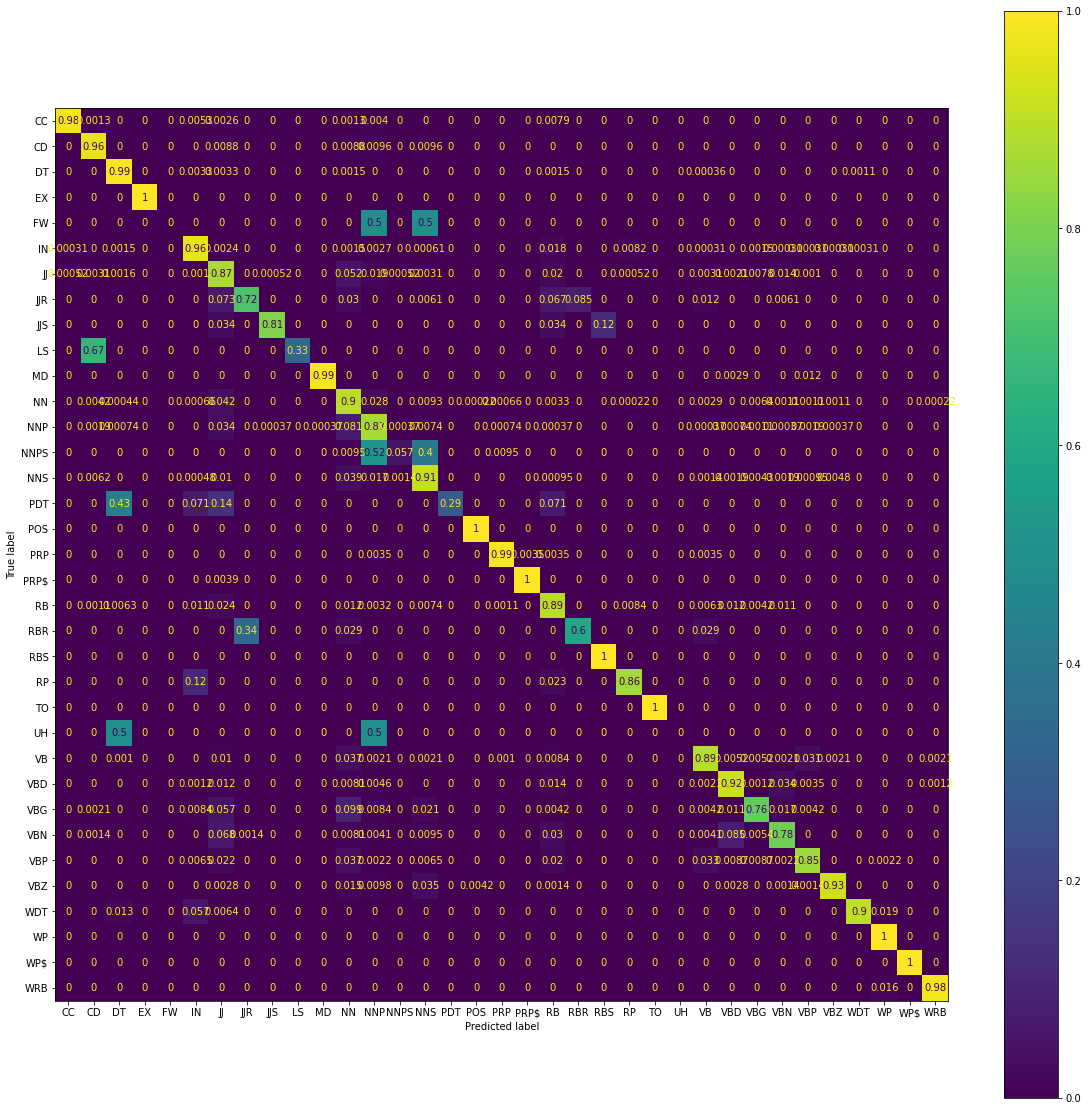

In [46]:
print("Baseline validation results:")
true_y, pred_y = reduce_results(df_val_y, baseline_pred, encoder)
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(true_y, pred_y, ax=ax, labels=list(relevant_labels), normalize = "true")
print(classification_report(true_y,pred_y, labels = relevant_labels, digits=4, zero_division=0))


GRU variation validation results:
              precision    recall  f1-score   support

          CC     0.9946    0.9789    0.9867       758
          CD     0.9524    0.9295    0.9408      1249
          DT     0.9834    0.9916    0.9875      2754
          EX     0.9189    1.0000    0.9577        34
          FW     0.0000    0.0000    0.0000         2
          IN     0.9765    0.9658    0.9711      3275
          JJ     0.7975    0.8493    0.8226      1924
         JJR     0.8986    0.7515    0.8185       165
         JJS     0.9167    0.7586    0.8302        58
          LS     0.0000    0.0000    0.0000         3
          MD     0.9884    0.9798    0.9841       347
          NN     0.8717    0.8985    0.8849      4513
         NNP     0.8735    0.8674    0.8704      2699
        NNPS     0.5556    0.0476    0.0877       105
         NNS     0.9039    0.9125    0.9081      2102
         PDT     1.0000    0.0714    0.1333        14
         POS     0.9963    1.0000    0.9981    

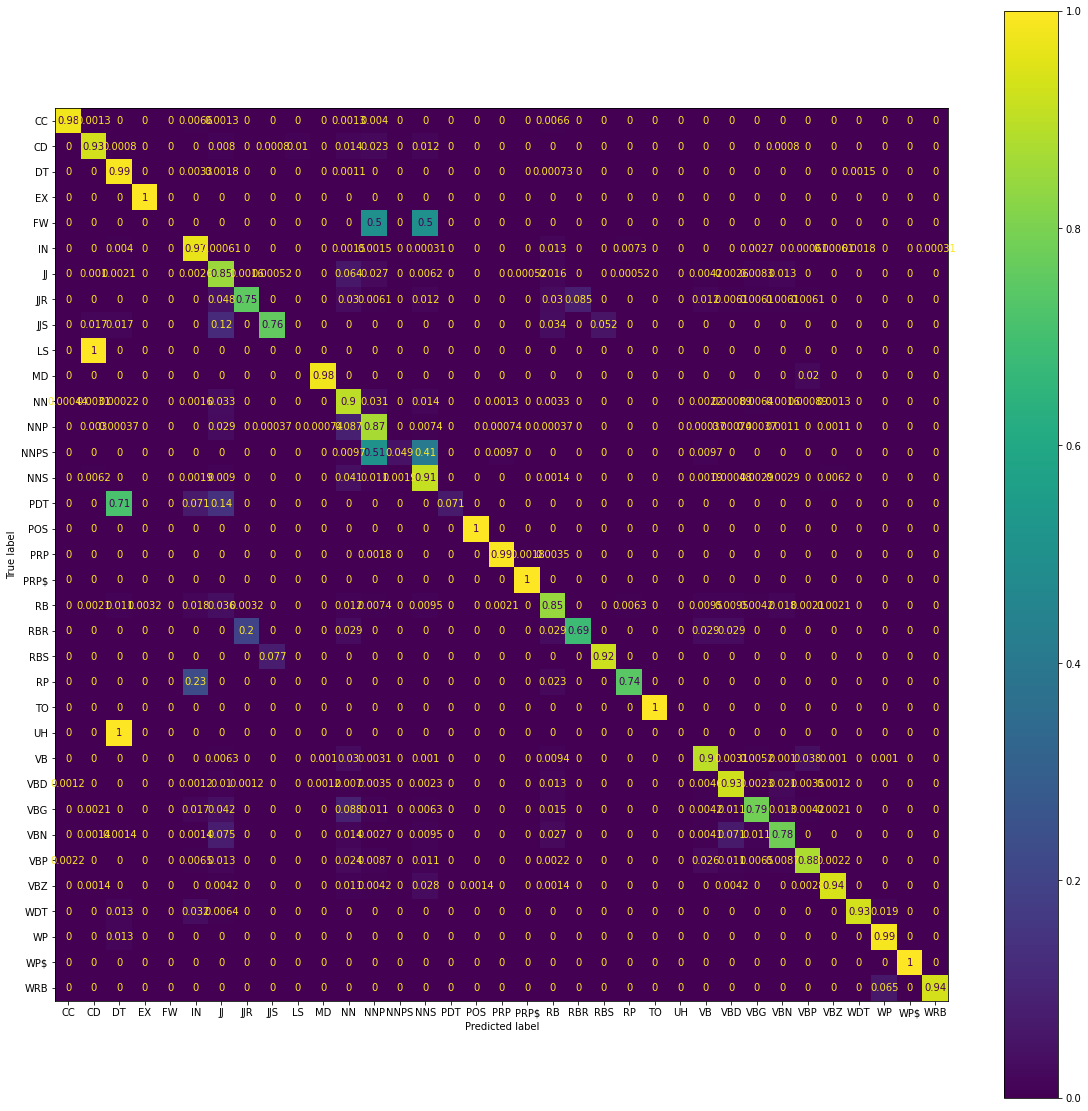

In [47]:
print("GRU variation validation results:")
true_y, pred_y = reduce_results(df_val_y, GRU_pred, encoder)
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(true_y, pred_y, ax=ax, labels=list(relevant_labels), normalize = "true")
print(classification_report(true_y,pred_y, labels = relevant_labels, digits=4, zero_division=0))


doubleLSTM variation validation results:
              precision    recall  f1-score   support

          CC     0.9987    0.9842    0.9914       758
          CD     0.9578    0.9624    0.9601      1249
          DT     0.9952    0.9779    0.9864      2754
          EX     1.0000    1.0000    1.0000        34
          FW     0.0000    0.0000    0.0000         2
          IN     0.9713    0.9698    0.9705      3275
          JJ     0.7998    0.8909    0.8429      1924
         JJR     0.9200    0.8364    0.8762       165
         JJS     0.9474    0.6207    0.7500        58
          LS     1.0000    0.3333    0.5000         3
          MD     0.9913    0.9856    0.9884       347
          NN     0.8726    0.9180    0.8947      4513
         NNP     0.9064    0.8466    0.8755      2699
        NNPS     0.5455    0.1143    0.1890       105
         NNS     0.9419    0.9029    0.9220      2102
         PDT     1.0000    0.2857    0.4444        14
         POS     0.9963    1.0000    0.9

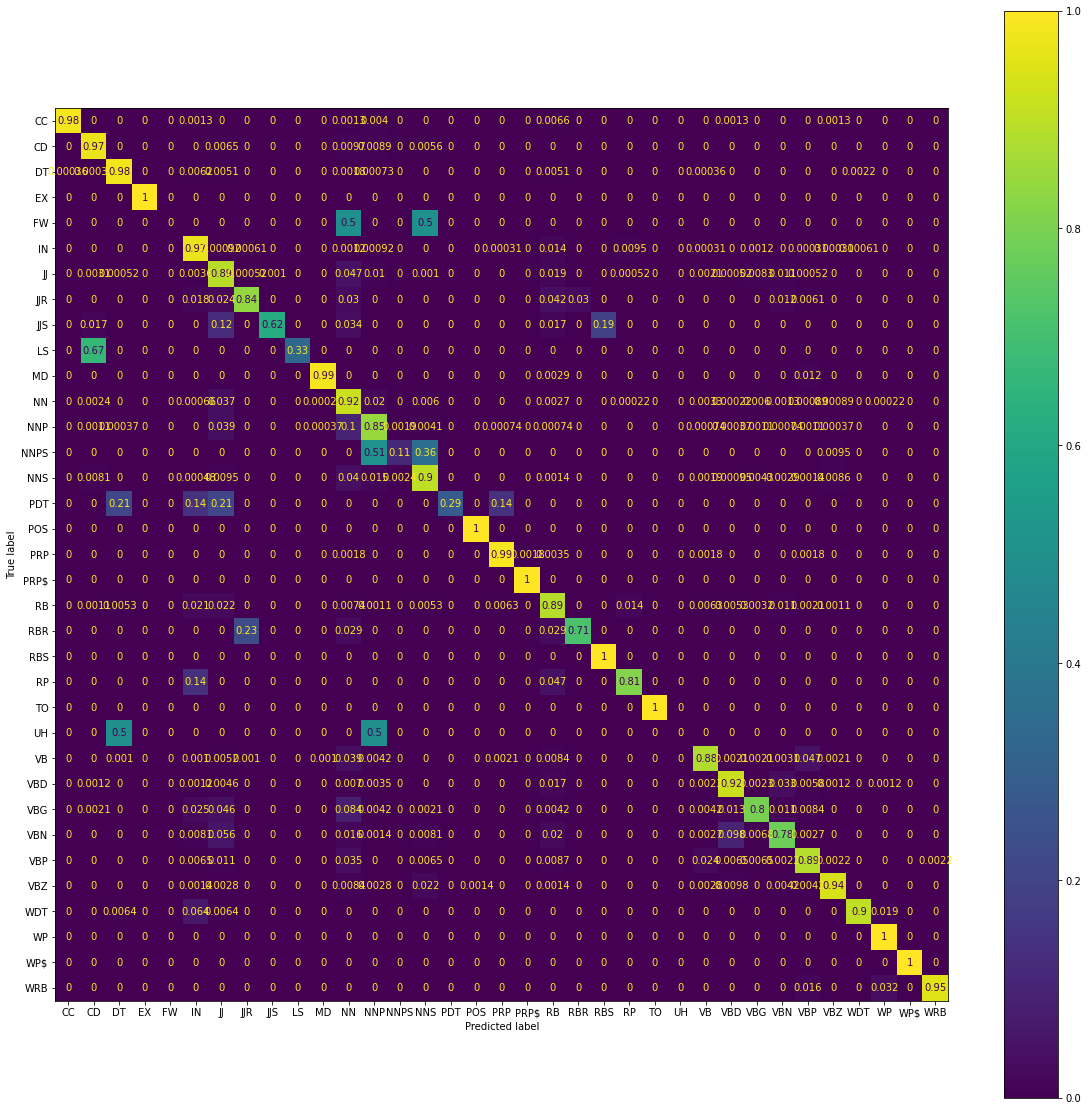

In [48]:
print("doubleLSTM variation validation results:")
true_y, pred_y = reduce_results(df_val_y, doubleLSTM_pred, encoder)
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(true_y, pred_y, ax=ax, labels=list(relevant_labels), normalize = "true")
print(classification_report(true_y,pred_y, labels = relevant_labels, digits=4, zero_division=0))

doubleDense variation validation results:
              precision    recall  f1-score   support

          CC     0.9987    0.9855    0.9920       758
          CD     0.9582    0.9552    0.9567      1249
          DT     0.9931    0.9891    0.9911      2754
          EX     0.9714    1.0000    0.9855        34
          FW     0.0000    0.0000    0.0000         2
          IN     0.9774    0.9655    0.9714      3275
          JJ     0.8027    0.8669    0.8336      1924
         JJR     0.9000    0.8182    0.8571       165
         JJS     0.7361    0.9138    0.8154        58
          LS     0.5000    0.3333    0.4000         3
          MD     0.9971    0.9856    0.9913       347
          NN     0.9034    0.8704    0.8866      4513
         NNP     0.8526    0.8937    0.8726      2699
        NNPS     0.4262    0.2476    0.3133       105
         NNS     0.9045    0.9196    0.9120      2102
         PDT     0.0000    0.0000    0.0000        14
         POS     0.9963    0.9963    0.

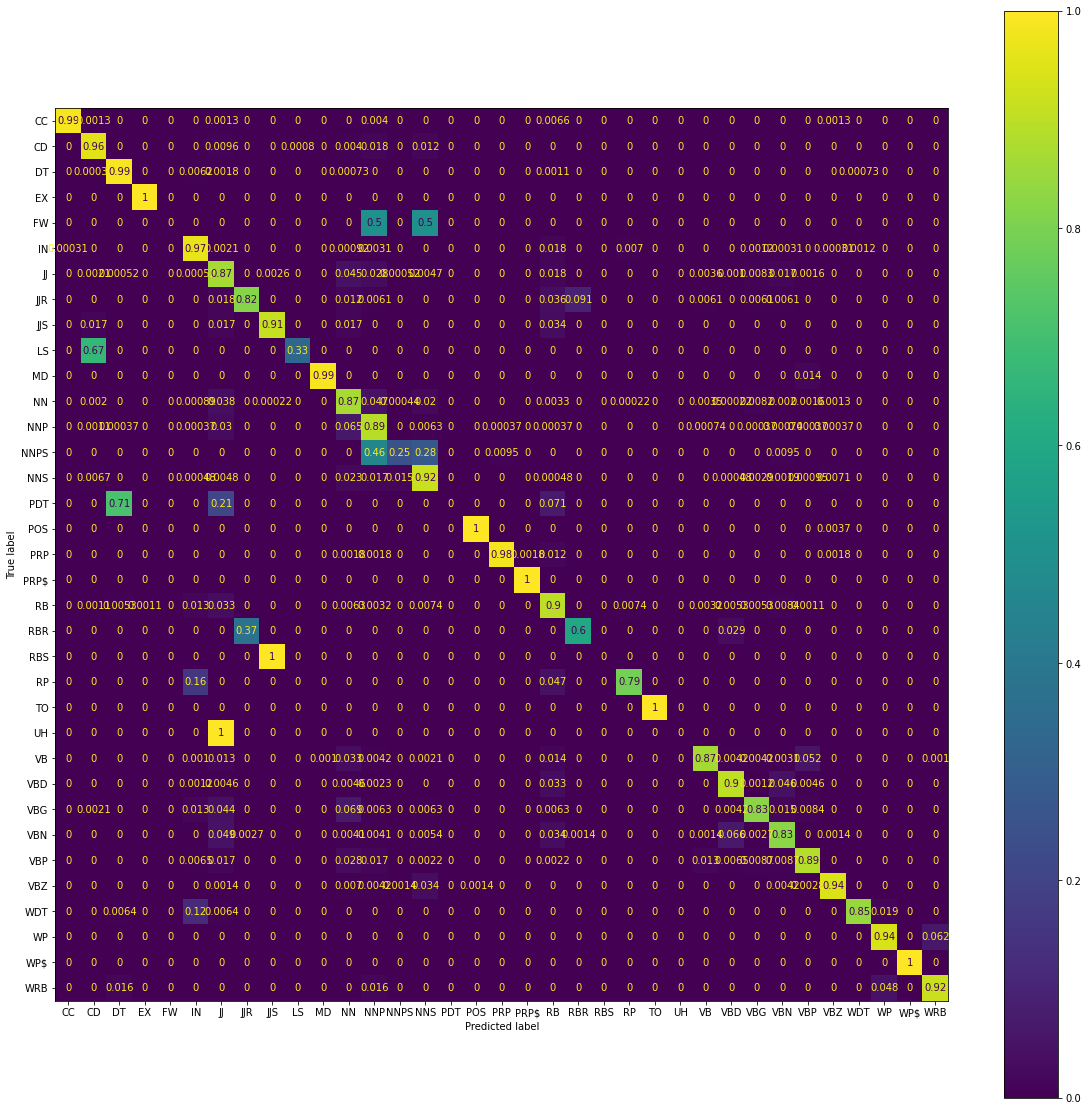

In [49]:
print("doubleDense variation validation results:")
true_y, pred_y = reduce_results(df_val_y, doubleDense_pred, encoder)
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(true_y, pred_y, ax=ax, labels=list(relevant_labels), normalize = "true")
print(classification_report(true_y,pred_y, labels = relevant_labels, digits=4, zero_division=0))

The two model that performed better on the validation set were the baseline and the variation with two LSTMs which achieve more than 80%. The other variations have all a smaller F1-score with respect to the baseline because:
- The GRU is essentially simpler wrt LSTM, so not only it looses some performance on PDT, but also a bit on almost all the classes;
- the double Dense variation has more parameters on the section that doesn't properly account for context, so it looses score percentage on ambiguous classes like JJR/RBR and on PDT. However it registers an higher score on the NNPS class.


#Step 7

Here follows the evaluation of the best two models over the test set, in the same way it was performed over the validation set.

In [50]:
baseline_pred_test = baseline.predict(test_sentences_X)
doubleLSTM_pred_test = doubleLSTM.predict(test_sentences_X)

20/20 [==============================] - 0s 13ms/step


baseline test evaluation:
              precision    recall  f1-score   support

          CC     0.9918    0.9918    0.9918       366
          CD     0.9545    0.9790    0.9666       857
          DT     0.9895    0.9910    0.9903      1333
          EX     1.0000    1.0000    1.0000         5
          FW     0.0000    0.0000    0.0000         0
          IN     0.9798    0.9526    0.9660      1626
          JJ     0.7760    0.8800    0.8247       917
         JJR     0.9216    0.7966    0.8545        59
         JJS     0.9630    0.8387    0.8966        31
          LS     0.0000    0.0000    0.0000         0
          MD     0.9653    1.0000    0.9824       167
          NN     0.8904    0.8983    0.8943      2379
         NNP     0.9088    0.8749    0.8915      1503
        NNPS     0.7500    0.0682    0.1250        44
         NNS     0.9128    0.9012    0.9070       941
         PDT     0.0000    0.0000    0.0000         4
         POS     0.9934    0.9934    0.9934       152
 

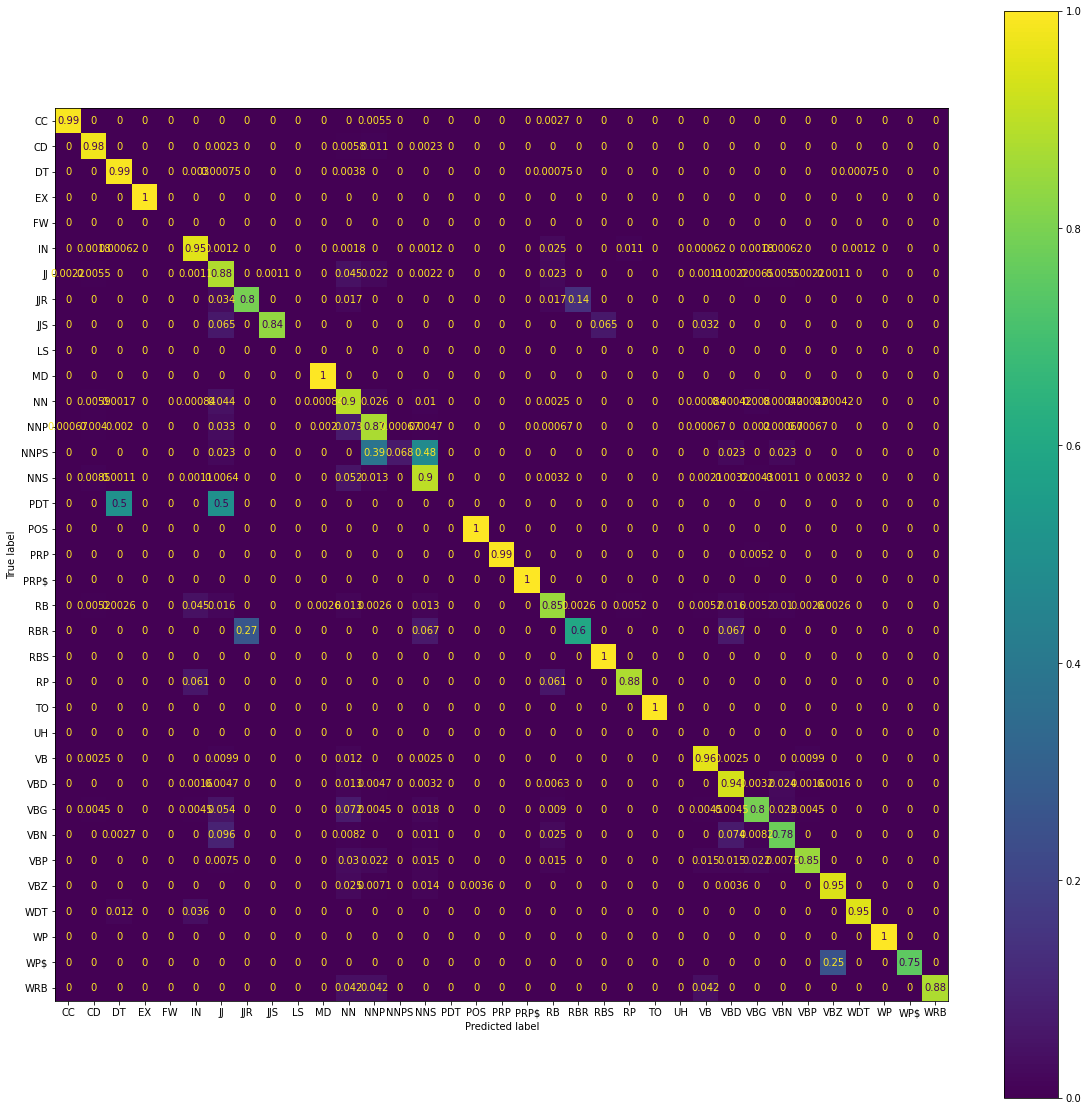

In [51]:
print("baseline test evaluation:")
true_y, pred_y = reduce_results(df_test_y, baseline_pred_test, encoder)
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(true_y, pred_y, ax=ax, labels=list(relevant_labels), normalize = "true")
print(classification_report(true_y,pred_y, labels = relevant_labels, digits=4,zero_division=0))

doubleLSTM test evaluation:
              precision    recall  f1-score   support

          CC     0.9865    0.9973    0.9918       366
          CD     0.9756    0.9802    0.9779       857
          DT     0.9940    0.9880    0.9910      1333
          EX     1.0000    1.0000    1.0000         5
          FW     0.0000    0.0000    0.0000         0
          IN     0.9793    0.9625    0.9708      1626
          JJ     0.7850    0.8800    0.8298       917
         JJR     0.8387    0.8814    0.8595        59
         JJS     1.0000    0.5806    0.7347        31
          LS     0.0000    0.0000    0.0000         0
          MD     0.9709    1.0000    0.9853       167
          NN     0.8837    0.9134    0.8983      2379
         NNP     0.9191    0.8616    0.8894      1503
        NNPS     0.6364    0.1591    0.2545        44
         NNS     0.9435    0.9044    0.9235       941
         PDT     1.0000    0.2500    0.4000         4
         POS     0.9934    0.9934    0.9934       152

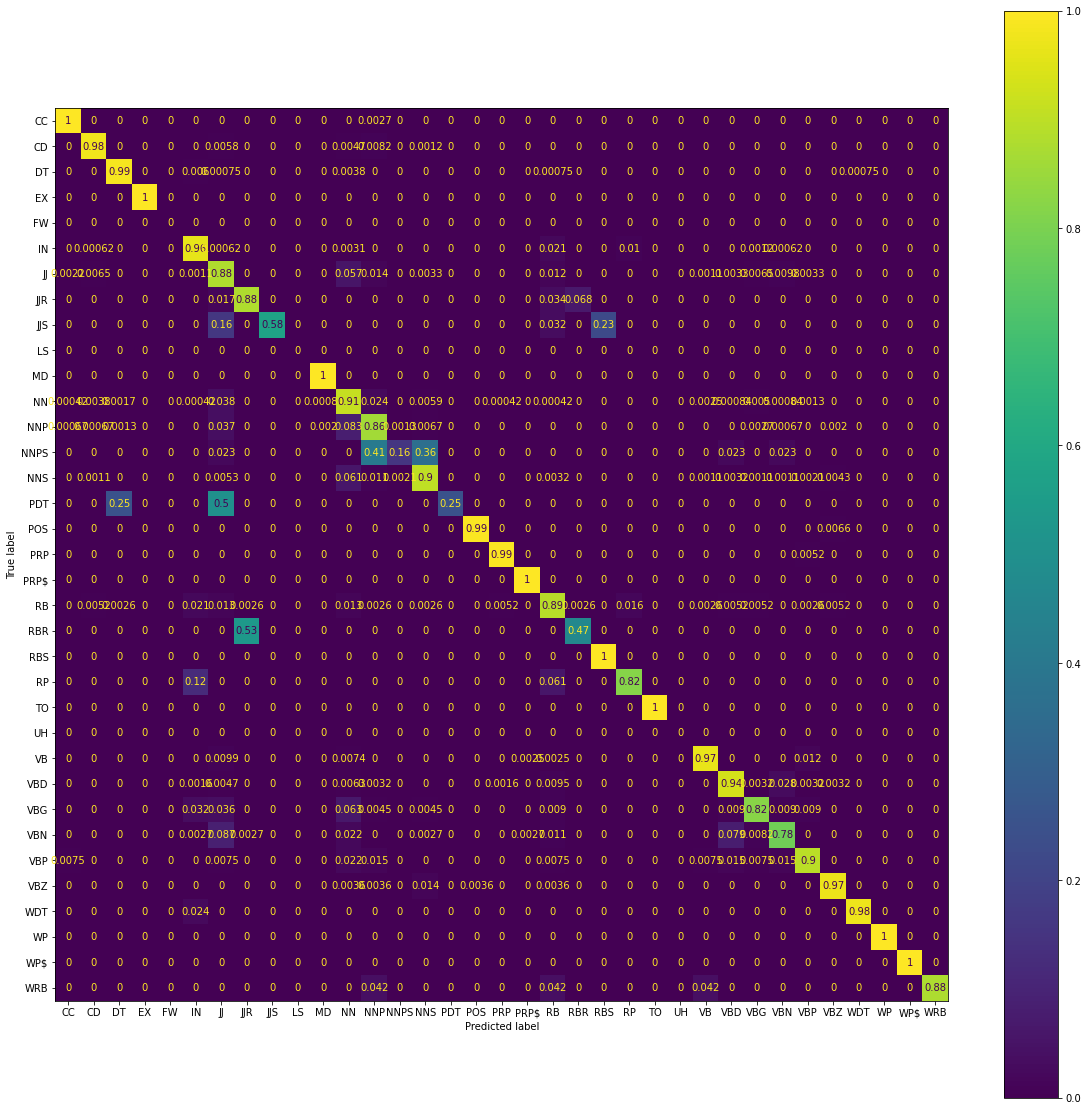

In [52]:
print("doubleLSTM test evaluation:")
true_y, pred_y = reduce_results(df_test_y, doubleLSTM_pred_test, encoder)
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(true_y, pred_y, ax=ax, labels=list(relevant_labels), normalize = "true")
print(classification_report(true_y,pred_y, labels = relevant_labels, digits=4,zero_division=0))

In the end we can observe that the macro F1-score on test is just slightly less due to more classes missing, and thus more 0s being aggregated to the final macro score. However, the results and relative improvements among the two models are still coherent with the ones on validation. These results also confirm the problematic classes for these models:
- Inherently ambiguous classes. It's easy to notice as NNPS (Proper noun in plural form) is almost always predicted with NNP (proper noun) or NNS (plural noun). List item markers (LS), since they are composed of numbers, they are predicted as Cardinal Numbers (CD). Particles (RP) are usually confused with Prepositions (IN)due to overlapping words (over, on, down...). Comparative and superlative adverbs (RBR and RBS) are predicted with their more common adjective counterparts (JJR and JJS). The network seems not to capture perfectly (even if the 2LSTM variation improves on this) that their distinction is based on which part of the sentence they modify (nouns for adjectives and verbs for adverbs).
- Predeterminers (PDT). Even if they appear almost always before Determiners (DT), the network doesn't capture this relation, and predicts them as DT or Adjectives (JJ).
- Low support classes, as Interjections (UH) and Foreign Words (FW) (respectively with 4 and 3 examples in the whole dataset). In fact, these classes have a very small number examples, so the network hasn't enough data to learn from them. But it isn't the number of examples alone to rise problems, but also the fact that each token is very different from the others. In fact, classes as "wh- possessive" (WP$) or "Existential There" (EX) have still low support but are correctly predicted as they are easily recognizable both from the few tokens that represent them and the context they are found in. 